In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as sc
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('googleplaystore.csv')   # importig dataset...

## Understanding Dataset

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape

(10841, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()     

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Cleaning Dataset

Droping unneccessary features
* App
* Current Ver
* Android Ver

In [9]:
df = data

In [10]:
df.drop(labels = ['Current Ver','Android Ver'], axis = 1, inplace = True)

In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


Now changing categeorical features into numeric form

In [12]:
df.shape

(10841, 11)

### Reviews

In [13]:
df['Reviews'].str.isnumeric().sum()  #total rows are 10841 lets us see which row is non-numeric.

10840

In [14]:
df[~df['Reviews'].str.isnumeric()]          

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


In [15]:
df=df.drop(data.index[10472])     # it has many null values so it is best to drop this row.

In [16]:
df[10470:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017"
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014"
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018"
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014"


In [17]:
df["Reviews"] = df["Reviews"].astype(int)

In [18]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
dtype: object

### Size

In [19]:
df["Size"] = [str(round(float(i.replace("k", ""))/1024,2)) if "k" in i else i for i in df.Size]

In [20]:
df["Size"].iloc[10469:10475]

10469     58M
10470    4.0M
10471    0.39
10473    4.1M
10474     14M
10475    2.6M
Name: Size, dtype: object

In [21]:
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))

In [22]:
df['Size'] = df.Size.str.replace('M', 'e6')

In [23]:
df['Size'] =df.Size.str.replace('Varies with device','nan') 

In [24]:
df['Size'] = df['Size'].astype(float)

In [25]:
df['Size'].isnull().sum()

1695

In [26]:
df['Size'].mean()

21.516174958993886

In [27]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
dtype: object

### Installs

In [28]:
df.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [29]:
df['Installs'] = df['Installs'].astype(str)

In [30]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace('+','').replace(',', ''))

In [31]:
df['Installs'] = pd.to_numeric(df['Installs'])

In [32]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
dtype: object

2. What is the name of the 15 most downloaded applications?

In [33]:
df[['App','Installs']].value_counts().head(15)

App                                                 Installs  
ROBLOX                                              100000000     9
CBS Sports App - Scores, News, Stats & Watch Live   5000000       8
ESPN                                                10000000      7
8 Ball Pool                                         100000000     7
Duolingo: Learn Languages Free                      100000000     7
Candy Crush Saga                                    500000000     7
Nick                                                10000000      6
Helix Jump                                          100000000     6
Temple Run 2                                        500000000     6
slither.io                                          100000000     6
Zombie Catchers                                     10000000      6
Sniper 3D Gun Shooter: Free Shooting Games - FPS    100000000     6
Bowmasters                                          50000000      6
Bleacher Report: sports news, scores, & highlights  5

3. What is the download rate for paid applications?

In [34]:
a=df.groupby(['Type'])
b=a.get_group('Paid')
b

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.80,100000,Paid,$4.99,Everyone,Business,"March 25, 2018"
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.00,100000,Paid,$4.99,Everyone,Business,"April 11, 2017"
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.80,100000,Paid,$4.99,Everyone,Business,"March 25, 2018"
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.00,100000,Paid,$4.99,Everyone,Business,"April 11, 2017"
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,$3.99,Everyone,Communication,"July 5, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,0.15,100,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015"
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.40,1000,Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018"
10782,Trine 2: Complete Story,GAME,3.8,252,11.00,10000,Paid,$16.99,Teen,Action,"February 27, 2015"
10785,"sugar, sugar",FAMILY,4.2,1405,9.50,10000,Paid,$1.20,Everyone,Puzzle,"June 5, 2018"


### Price

In [35]:
df['Price'] = df['Price'].astype(str)

In [36]:
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))

In [37]:
df['Price'] = df['Price'].astype(float)

In [38]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.00,4.0,4.3,4.5,5.000000e+00
Reviews,10840.0,4.441529e+05,2.927761e+06,0.00,38.0,2094.0,54775.5,7.815831e+07
Size,9145.0,2.151617e+01,2.258908e+01,0.01,4.9,13.0,30.0,1.000000e+02
Installs,10840.0,1.546434e+07,8.502936e+07,0.00,1000.0,100000.0,5000000.0,1.000000e+09
Price,10840.0,1.027368e+00,1.594970e+01,0.00,0.0,0.0,0.0,4.000000e+02


#### Filling Null Values..

In [40]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [41]:
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [42]:
df['Type'] = df['Type'].fillna('Free')  

In [43]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

we can also fill the null values of rating by correalting installs..

In [44]:
# rt_mean1=df[((df['Installs']>=0)&(df['Installs']<=5))]['Rating'].mean()
# rt_mean2=df[((df['Installs']>=5)&(df['Installs']<=50))]['Rating'].mean()
# rt_mean3=df[((df['Installs']>50)&(df['Installs']<=500))]['Rating'].mean()
# rt_mean4=df[((df['Installs']>500)&(df['Installs']<=1000))]['Rating'].mean()
# rt_mean5=df[((df['Installs']>1000)&(df['Installs']<=10000))]['Rating'].mean()
# rt_mean6=df[((df['Installs']>10000)&(df['Installs']<=100000))]['Rating'].mean()
# rt_mean7=df[((df['Installs']>100000)&(df['Installs']<=50000000))]['Rating'].mean()
# rt_mean8=df[((df['Installs']>50000000)&(df['Installs']<=1000000000))]['Rating'].mean()

In [45]:
# null_0_1=df[((df['Installs']>=0)&(df['Installs']<=5))].isnull().index.tolist()
# null_0_2=df[((df['Installs']>5)&(df['Installs']<=50))].isnull().index.tolist()
# null_0_3=df[((df['Installs']>50)&(df['Installs']<=500))].isnull().index.tolist()
# null_0_4=df[((df['Installs']>500)&(df['Installs']<=1000))].isnull().index.tolist()
# null_0_5=df[((df['Installs']>1000)&(df['Installs']<=10000))].isnull().index.tolist()
# null_0_6=df[((df['Installs']>10000)&(df['Installs']<=100000))].isnull().index.tolist()
# null_0_7=df[((df['Installs']>100000)&(df['Installs']<=50000000))].isnull().index.tolist()
# null_0_8=df[((df['Installs']>50000000)&(df['Installs']<=1000000000))].isnull().index.tolist()

In [46]:
# df['Rating']=df['Rating'].iloc[null_0_1]=rt_mean1
# df['Rating']=df['Rating'].iloc[null_0_2]=rt_mean2
# df['Rating']=df['Rating'].iloc[null_0_3]=rt_mean3
# df['Rating']=df['Rating'].iloc[null_0_4]=rt_mean4
# df['Rating']=df['Rating'].iloc[null_0_5]=rt_mean5
# df['Rating']=df['Rating'].iloc[null_0_6]=rt_mean6
# # df['Rating'].iloc[null_0_7]=rt_mean7
# df['Rating']=df['Rating'].iloc[null_0_8]=rt_mean8 

In [47]:
not_null_df=df[pd.notnull(df['Rating'])]
mean=np.mean(not_null_df['Rating'])
median=np.median(not_null_df['Rating'])
mode=sc.mode(not_null_df['Rating'])
print(' Mean :',mean,'\n','Median :',median,'\n','Mode :',mode)

 Mean : 4.191757420456978 
 Median : 4.3 
 Mode : ModeResult(mode=array([4.4]), count=array([1109]))


In [48]:
df['Rating'].fillna(median,inplace=True)   #we can fill nan values either by median or by mode because they are same

In [49]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [131]:
grp=df.groupby(['Category','Installs','Rating']).mean()
grp.head(20)

Reviews   Size  Type  Price  \
Category       Installs Rating                                   
ART_AND_DESIGN 0        4.3       0.000000   1.20   1.0  0.000   
               100      5.0       1.000000   2.90   1.0  0.000   
               1000     4.0      18.000000   3.60   1.0  0.000   
                        4.4      13.000000   4.50   1.0  0.000   
                        4.7     149.000000   3.50   0.0  1.990   
               5000     3.2      55.000000   2.70   1.0  0.000   
                        4.3       7.000000   5.60   1.0  0.000   
                        4.7     801.000000   3.50   0.0  1.990   
                        4.8      44.500000  13.45   1.0  0.000   
               10000    3.9     136.000000   4.60   1.0  0.000   
                        4.1     159.000000  19.00   1.0  0.000   
                        4.2      71.500000  13.50   1.0  0.000   
                        4.3     132.000000   7.70   1.0  0.000   
                        4.5      27.000000  17.00   1.0  0.000   
                        4.7     210.666667   6.10   1.0  0.000   
                        4.8     704.000000   7.30   0.5  0.995   
               50000    3.8     178.000000  19.00   1.0  0.000   
                        4.1     227.000000   5.20   1.0  0.000   
                        4.2     175.000000   8.20   1.0  0.000   
                        4.4     167.000000   5.60   1.0  0.000   

                                Content Rating    Genres  lastupdate  
Category       Installs Rating                                        
ART_AND_DESIGN 0        4.3                1.0  9.000000  512.000000  
               100      5.0                1.0  9.000000  112.000000  
               1000     4.0                1.0  9.000000  139.000000  
                        4.4                1.0  9.000000  134.000000  
                        4.7                1.0  9.000000    9.000000  
               5000     3.2                1.0  9.000000   63.000000  
                        4.3                1.0  9.000000   70.000000  
                        4.7                1.0  9.000000    9.000000  
                        4.8                1.0  9.000000   72.500000  
               10000    3.9                1.0  9.000000   27.000000  
                        4.1                1.0  9.000000  213.000000  
                        4.2                1.0  9.000000  118.000000  
                        4.3                1.0  9.000000  216.000000  
                        4.5                1.0  9.000000  274.000000  
                        4.7                2.0  9.666667  130.333333  
                        4.8                1.0  9.000000   74.000000  
               50000    3.8                1.0  9.000000  104.000000  
                        4.1                1.0  9.000000   69.000000  
                        4.2                1.0  9.000000  439.000000  
                        4.4                1.0  9.000000  500.000000

Sort by category.

In [50]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

### Data Visualisation

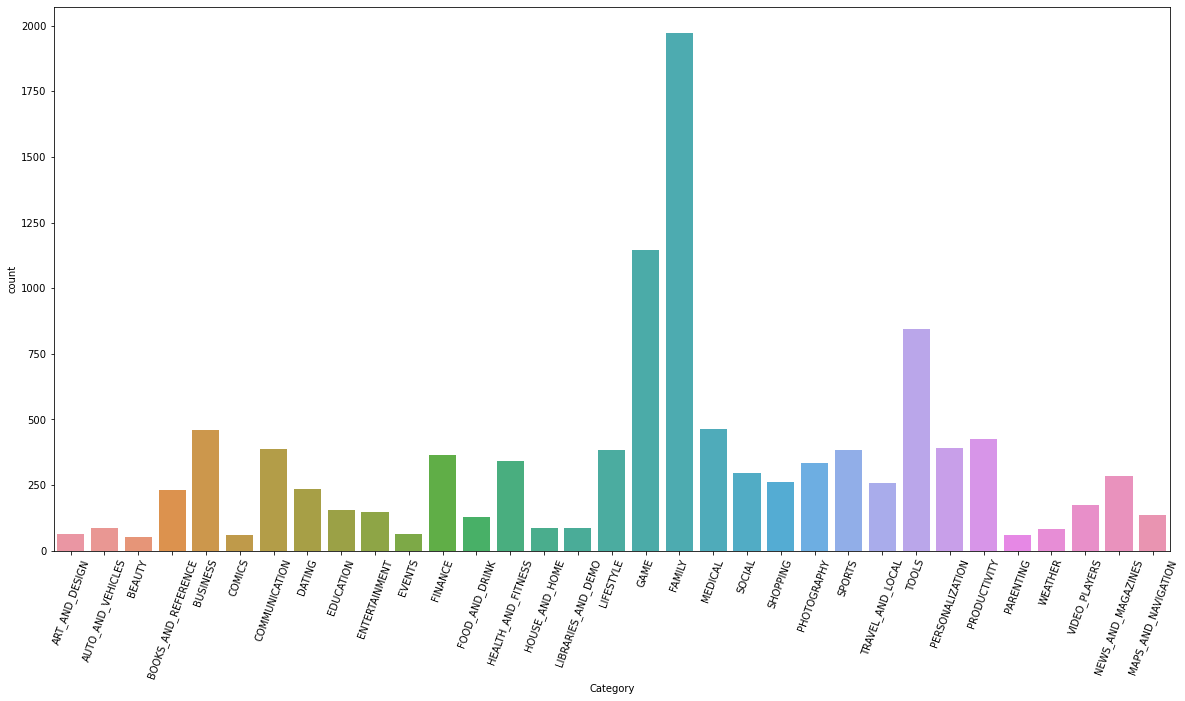

In [51]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=df)
plt.xticks(rotation=70)
plt.show()

3. What is the download rate for paid applications?
App type (Free or Paid)

(array([0, 1]), [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

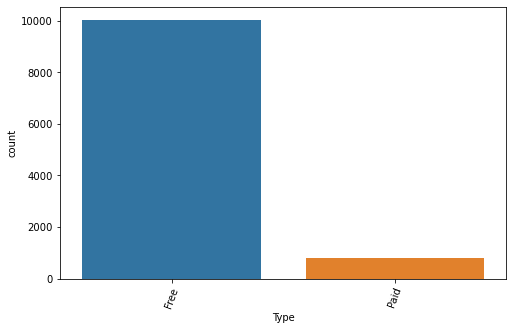

In [52]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=df)
plt.xticks(rotation=70)

From this plot we can see, Most of the apps are Free.. 

<AxesSubplot:ylabel='Type'>

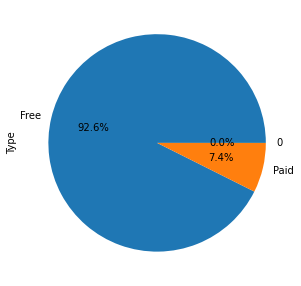

In [53]:
data["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

We can see that 92.6 % of the apps are free Where as only 7.4 % of apps are paid

In [54]:
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="Type",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

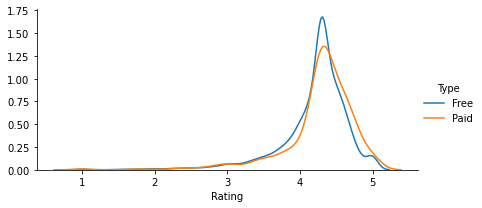

In [55]:
kde_plot('Rating')

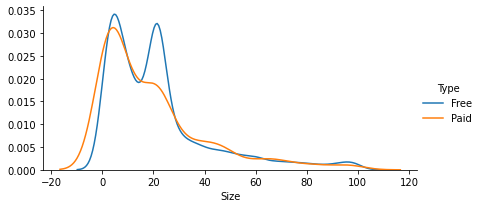

In [56]:
kde_plot('Size')

C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


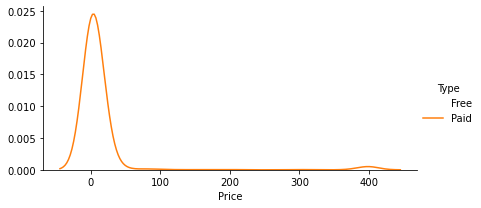

In [57]:
kde_plot('Price')

In [58]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
dtype: object

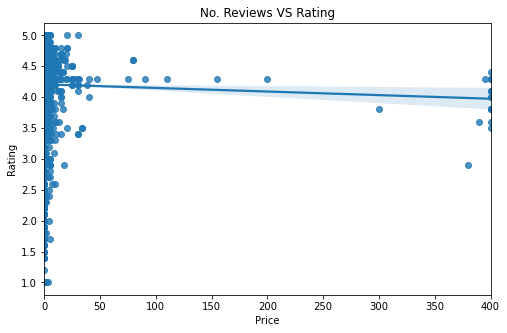

In [59]:
sns.regplot(x='Price', y='Rating', data=df)
plt.title('No. Reviews VS Rating')
plt.show()

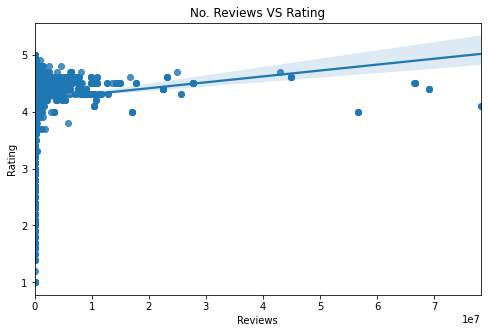

In [60]:
sns.regplot(y='Rating', x='Reviews', data=df)
plt.title('No. Reviews VS Rating')
plt.show()

We can see a positive trend between rating and number of reviews, apps with more reviews tends to have higher rating.

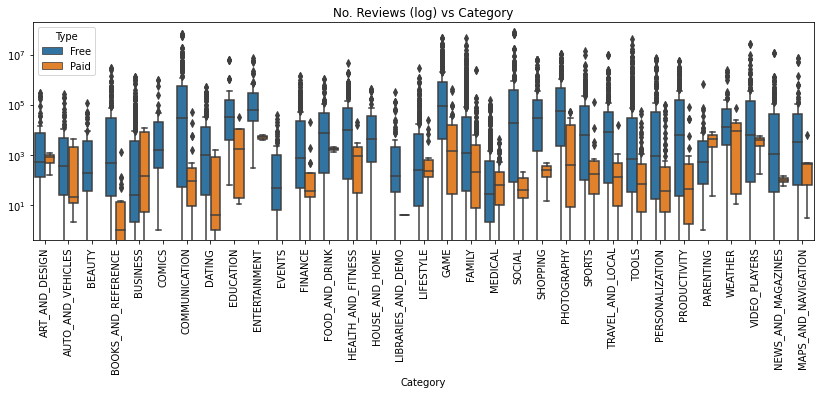

In [61]:
plt.figure(figsize=(14,4))
sns.boxplot(x='Category', y='Reviews', data=df, hue='Type')
plt.yscale('log')
plt.ylabel('')
plt.xticks(rotation=90);
plt.title('No. Reviews (log) vs Category')
plt.show()

We can see that apps with the category game, entertainment, education and photography have more reviews than apps of other categories.
In particular, free apps seems to have more reviews than paid apps for most categories, with the exception of business and weather, there paid apps have more reviews overall.

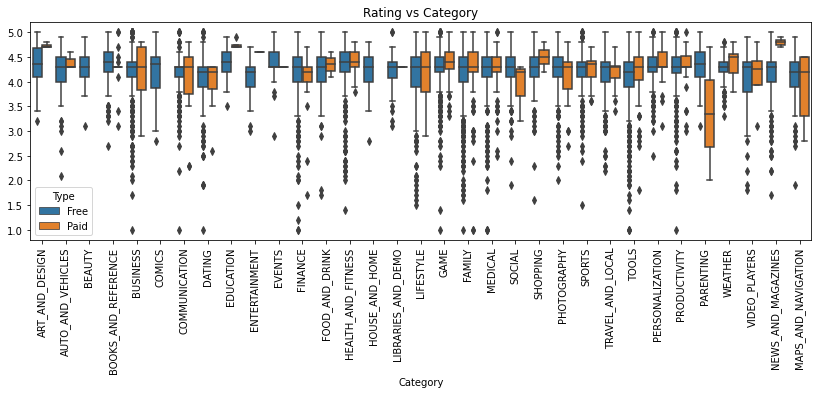

In [62]:
plt.figure(figsize=(14,4))
sns.boxplot(x='Category', y='Rating', data=df, hue='Type')
plt.xticks(rotation=90);
plt.title('Rating vs Category')
plt.ylabel('')
plt.show()

From this plot we can see that in most categories, paid apps have higher rating than free apps. In particular it is also interesint to notice that free apps have lots of outlier values compared to paid apps.

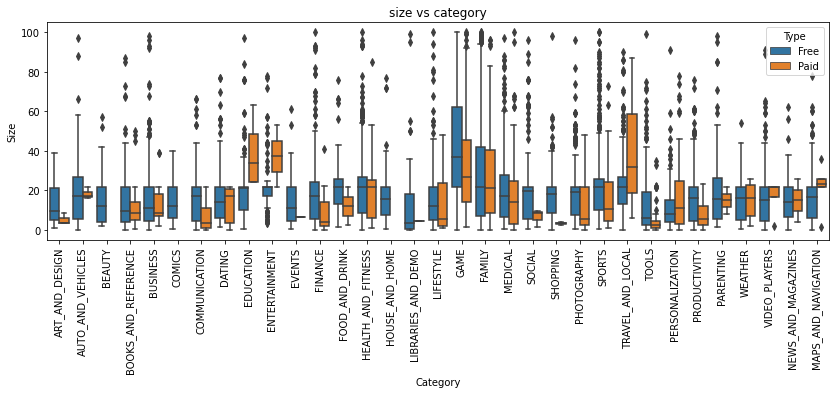

In [63]:
plt.figure(figsize=(14,4))
sns.boxplot(x='Category', y='Size', data=df, hue='Type')
plt.xticks(rotation=90);
plt.title('size vs category')
plt.show()

We can see that the category where apps have a higher size are 'game', 'travel and local' (for paid apps only), education (for paid apps only) and family.
In particular, free apps seems to have a higher size compared to paid apps for almost all categories.

<AxesSubplot:xlabel='Rating', ylabel='Size'>

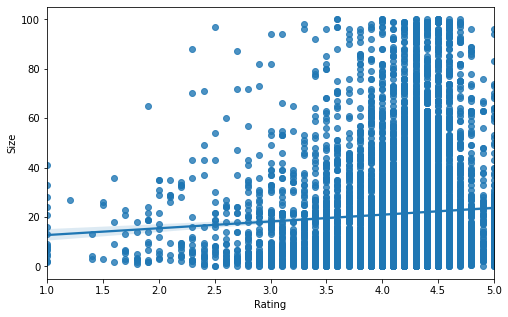

In [64]:
sns.regplot(x='Rating', y='Size', data=df)

We can see that apps with higher ratings have more possible sizes compared to apps with lower ratings (<3.0), where the size is almost always under 40 MB.

Text(0.5, 1.0, 'Correlation Matrix')

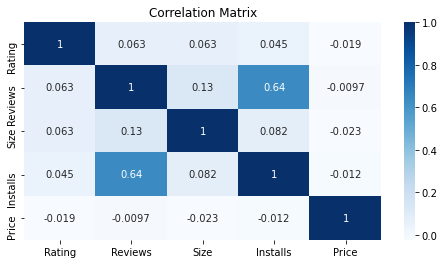

In [65]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

There is a quite high positive correlation between installs and reviews. This means that apps with higher reviews have more installs.

Categorial Values

In [66]:
Counter(df["Content Rating"])

Counter({'Everyone': 8714,
         'Teen': 1208,
         'Everyone 10+': 414,
         'Mature 17+': 499,
         'Adults only 18+': 3,
         'Unrated': 2})

In [67]:
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])

In [68]:
df['Type'] = pd.get_dummies(df['Type'])

In [69]:
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

In [70]:
Counter(df["Genres"]==0)

Counter({False: 10475, True: 365})

In [71]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,1,0.0,1,9,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,1,0.0,1,12,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,1,0.0,1,9,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,1,0.0,4,9,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,1,0.0,1,11,"June 20, 2018"


In [72]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,1,0.0,1,9,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,1,0.0,1,12,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,1,0.0,1,9,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,1,0.0,4,9,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,1,0.0,1,11,"June 20, 2018"


In [73]:
df['new'] = pd.to_datetime(df['Last Updated'])

In [74]:
df['lastupdate'] = (df['new'].max() -  df['new']).dt.days

In [76]:
x = df.drop(labels=["Rating","Category", "Last Updated", "new","Type","Size","lastupdate",'App'], axis = 1)
y = df['Rating']

In [77]:
x.head()

,Reviews,Installs,Price,Content Rating,Genres
0,159,10000,0.0,1,9
1,967,500000,0.0,1,12
2,87510,5000000,0.0,1,9
3,215644,50000000,0.0,4,9
4,967,100000,0.0,1,11


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state =0)

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [80]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [81]:
lr.score(x_test,y_test)

0.005513738918294431

In [82]:
knn = KNeighborsRegressor(n_neighbors=50)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=50)

In [83]:
knn.score(x_test,y_test)

0.10481253736259732

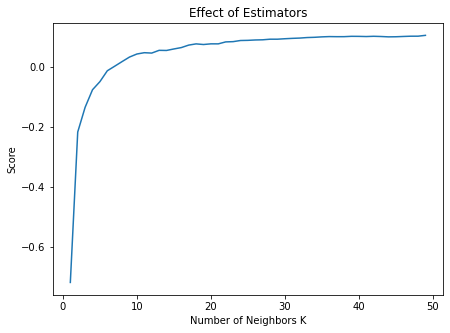

In [84]:
n_neighbors = np.arange(1, 50, 1)
scores = []
for n in n_neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

Random Forest Regressor

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [86]:
scaler.fit(X_train)

MinMaxScaler()

In [87]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)   

In [88]:
rf = RandomForestRegressor()

In [89]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [90]:
y_pred_rf = rf.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RMSE using RF: ", np.sqrt(mse_rf))

RMSE using RF:  0.4584194409834233
